In [1]:
from eos.relativistic_ISCT import Relativistic_ISCT
from scipy.optimize import fsolve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bugaev, K.A., Emaus, R., Sagun, V.V. et al. Threshold Collision Energy of the QCD Phase Diagram Tricritical Endpoint. Phys. Part. Nuclei Lett. 15, 210–224 (2018). https://doi.org/10.1134/S1547477118030068
G_TOTAL = 1770.
G_FERMION = 140.                # approx 141 in article 
G_BOSON = G_TOTAL - 7./4.*G_FERMION

# Bugaev, K.A., Ivanytskyi, A.I., Oliinychenko, D.R. et al. Thermodynamically anomalous regions as a mixed phase signal. Phys. Part. Nuclei Lett. 12, 238–245 (2015). https://doi.org/10.1134/S1547477115020065
ENTR_TO_BAR_DENS_RATIO = 11.31482

In [6]:
df = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_.csv')

In [7]:
print(df.to_latex(index=False))

\begin{tabular}{rrrrr}
\toprule
     T &  bar\_dens &  entr\_per\_bar\_dens &          m &          mu \\
\midrule
 125.0 &      11.0 &            7.00000 &  27.279235 &  450.801525 \\
 125.0 &      11.0 &            8.00000 &  22.106959 &  416.463783 \\
 125.0 &      11.0 &            9.00000 &        NaN &         NaN \\
 125.0 &      11.0 &           10.00000 &  15.123825 &  364.750862 \\
 125.0 &      12.0 &            7.00000 &        NaN &         NaN \\
 125.0 &      12.0 &            8.00000 &  18.947414 &  411.218145 \\
 125.0 &      12.0 &            8.00000 &  18.947414 &  411.218132 \\
 125.0 &      12.0 &            9.00000 &  15.490590 &  383.577883 \\
 125.0 &      12.0 &           10.00000 &  12.800712 &  360.145204 \\
 125.0 &      13.0 &           11.00000 &   9.031089 &  335.695473 \\
 125.0 &      13.0 &           11.31482 &   8.516907 &  329.850909 \\
 125.0 &      13.0 &           12.00000 &        NaN &         NaN \\
 125.0 &      13.0 &           13.00000 &   6

In [8]:
ch_f_df = pd.read_csv('cs_sq_fulldata/chem_f_o_T_mu_digitized.csv').dropna()

In [145]:
df = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_.csv').dropna()
df_lgf = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_lgf_10per.csv')
df_nm = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_nm.csv')
df_nm_lgf = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_nm_lgf_10per.csv')

In [10]:
def qcd_constr(T):
    mu = T*np.pi
    return mu
xdata = np.linspace(ch_f_df['T'].min(), ch_f_df['T'].max())
ydata = qcd_constr(xdata)

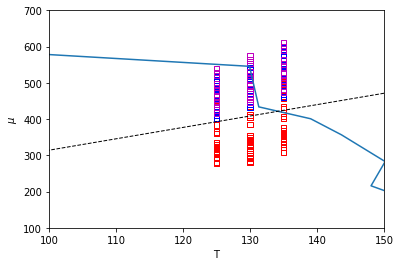

In [11]:
plt.plot(ch_f_df['T'], ch_f_df['mu'])
plt.plot(xdata, ydata, c='k', linestyle='--', linewidth=1)
plt.scatter(df['T'], df['mu'], s=30, marker='s', edgecolor='r', color='None')

plt.scatter(df_nm['T'], df_nm['mu'], s=30, marker='s', edgecolor='b', color='None')
plt.scatter(df_nm_lgf['T'], df_nm_lgf['mu'], s=30, marker='s', edgecolor='m', color='None')

plt.xlim(100,150)
plt.ylim(100,700)

plt.xlabel('T')
plt.ylabel('$\mu$')
# plt.legend(frameon=False)

plt.show()

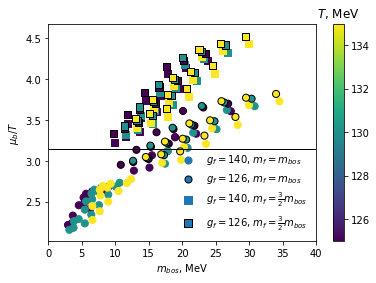

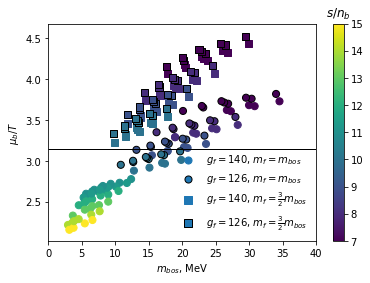

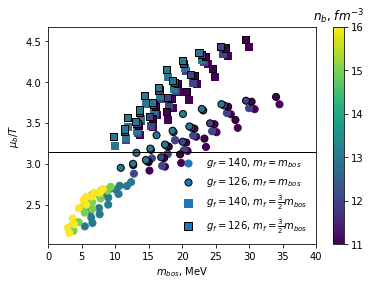

In [147]:
cmaps = ['T', 'entr_per_bar_dens', 'bar_dens']
cbar_labels = ['$T$, MeV', '$s/n_b$', '$n_b$, $fm^{-3}$']

for i in range(len(cmaps)):
    cmap = cmaps[i]
    cbar_label = cbar_labels[i]
    vmin=min(df[cmap].min(), df_lgf[cmap].min(), df_nm[cmap].min(), df_nm_lgf[cmap].min())
    vmax=max(df[cmap].max(), df_lgf[cmap].max(), df_nm[cmap].max(), df_nm_lgf[cmap].max())

    plt.scatter(df['m'], df['mu']/df['T'], c=df[cmap], s=50, 
            marker='o', label='$g_f=140$, $m_f=m_{bos}$',
            vmin=vmin, vmax=vmax,
            )
    plt.scatter(df_lgf['m'], df_lgf['mu']/df_lgf['T'], c=df_lgf[cmap], s=50, 
            marker='o', label='$g_f=126$, $m_f=m_{bos}$',
            edgecolors='k', 
            vmin=vmin, vmax=vmax,
            )
    plt.scatter(df_nm['m'], df_nm['mu']/df_nm['T'], c=df_nm[cmap], s=50, 
            marker='s', 
            label='$g_f=140$, $m_f = \\frac{3}{2}m_{bos}$',
            vmin=vmin, vmax=vmax,
            )
    plt.scatter(df_nm_lgf['m'], df_nm_lgf['mu']/df_nm_lgf['T'], c=df_nm_lgf[cmap], s=50, 
            marker='s', 
            label='$g_f=126$, $m_f = \\frac{3}{2}m_{bos}$',
            edgecolors='k', 
            vmin=vmin, vmax=vmax,
            )
            
#     plt.scatter(selected_df['m'], selected_df['mu/T'], c='r', marker='s')

    plt.hlines(np.pi, 0, 100, linewidth=1)
    plt.xlim(0,40)
    # plt.ylim(2,)

    plt.xlabel('$m_{bos}$, MeV')
    plt.ylabel('$\\mu_b/T$')
    clb = plt.colorbar()
    clb.ax.set_title(cbar_label)
    plt.legend(frameon=False)
#     plt.savefig(f'visualization/plots/low_m_search_cb_{cmap}_2.pdf')
    plt.show()

# Cumulants

In [45]:
g_array = iter([[140., 1525.], [126., 1550.]])

for df in [df_nm, df_nm_lgf]:
    g = next(g_array)
    df['mu/T'] = df['mu']/df['T']

    Tdata = df['T'].to_numpy()
    m_data = df['m'].to_numpy()
    mu_data = df['mu'].to_numpy()

    cumul_lin_data = []
    cumul_sq_data = []

    for i in range(len(df)):
        T = Tdata[i]
        m = m_data[i]
        mu = mu_data[i]
        eos = Relativistic_ISCT(m=[1.5*m, m], R=0.39, b=0.,  components=2, eos='ISCT', g=g)

        cumul_lin_data.append(
            T*eos.cumulant_per_vol(1, 0, T, mu, 0.)/mu/eos.cumulant_per_vol(2, 0, T, mu, 0.)
        )
        cumul_sq_data.append(
            1. - eos.cumulant_per_vol(3, 0, T, mu, 0.)*eos.cumulant_per_vol(1, 0, T, mu, 0.)/eos.cumulant_per_vol(2, 0, T, mu, 0.)**2
        )
    df['cumul_lin_ratio'] = np.array(cumul_lin_data)
    df['cumul_sq_ratio'] = np.array(cumul_sq_data)

In [13]:
df_nm = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_nm.csv')
df_nm_lgf = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_nm_lgf_10per.csv')

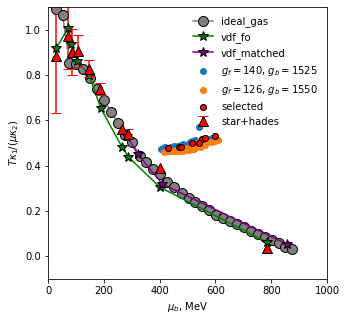

In [148]:
plot_cumul_digit(kind='lin')

plt.scatter(df_nm['mu'], df_nm['cumul_lin_ratio'], label='$g_f=140$, $g_b=1525$')
plt.scatter(df_nm_lgf['mu'], df_nm_lgf['cumul_lin_ratio'], label='$g_f=126$, $g_b=1550$')

plt.scatter(selected_df['mu'], selected_df['cumul_lin_ratio'], c='r', edgecolors='k', label='selected')

plt.legend(frameon=False)
# plt.savefig('visualization/plots/test_cumul_lin.pdf')
plt.show()

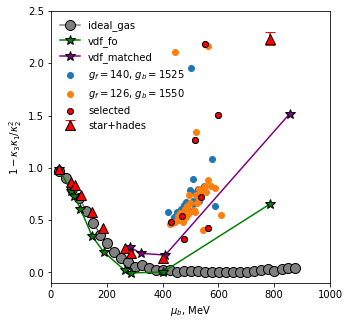

In [149]:
plot_cumul_digit(kind='sq')

plt.scatter(df_nm['mu'], df_nm['cumul_sq_ratio'], label='$g_f=140$, $g_b=1525$')
plt.scatter(df_nm_lgf['mu'], df_nm_lgf['cumul_sq_ratio'], label='$g_f=126$, $g_b=1550$')

plt.scatter(selected_df['mu'], selected_df['cumul_sq_ratio'], c='r', edgecolors='k', label='selected')

plt.legend(frameon=False)
# plt.savefig('visualization/plots/test_cumul_sq.pdf')
plt.show()

In [139]:
def plot_cumul_digit(kind='lin'):
    plt.figure(figsize=(5,5))

    if kind=='lin':
        col_name = 'cumul_lin'
        error_name = 'error_lin'
    elif kind=='sq':
        col_name = 'cumul_sq'
        error_name = 'error_sq'
    else:
        raise Exception('Wrong kind specified')


    names = [ 'ideal_gas', 'vdf_fo', 'vdf_matched', 'star+hades']
    colors = iter(['grey','g', 'purple', 'r'])
    markers = iter(['o', '*', '*', '^'])

    for name in names:
        df = pd.read_csv(f'cs_sq_fulldata/cumuls/cumuls_{name}_digit_.csv')

        color = next(colors)
        marker = next(markers)
        if name == 'star+hades':
            plt.errorbar(df['mu'], df[col_name], yerr=df[error_name], 
                label=name, c=color, marker=marker, markeredgecolor='k', markersize=10, 
                capsize=5,
                linestyle='',
                # zorder=2,
                )
        else:
            plt.plot(df['mu'], df[col_name], c=color, label=name, 
                    marker=marker, markersize=10, markeredgecolor='k',
                    # zorder=1,
                    )
        

    plt.xlim(0, 1000)
    if kind=='lin':
        plt.ylim(-0.1, 1.1)
    elif kind=='sq':
        plt.ylim(-0.1, 2.5)


    

    plt.xlabel('$\\mu_b$, MeV')
    if kind=='lin':
        plt.ylabel('$T \\kappa_1 / (\\mu \\kappa_2)$')
    elif kind=='sq':
        plt.ylabel('$1 - \\kappa_3 \\kappa_1 / \\kappa_2^2$')

    plt.legend(frameon=False)    

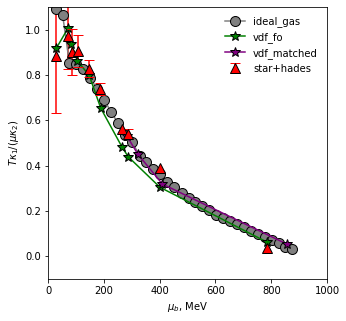

In [141]:
plot_cumul_digit(kind='lin')

In [130]:
df_nm[df_nm['T']==130.].sort_values('mu/T')

,T,bar_dens,entr_per_bar_dens,m,mu,mu/T,cumul_lin_ratio,cumul_sq_ratio
23,130.0,13.0,10.0,11.481923,431.598470,3.319988,0.479318,0.483617
19,130.0,12.0,10.0,13.345573,439.831908,3.383322,0.480566,0.507756
15,130.0,11.0,10.0,15.640397,448.752852,3.451945,0.481830,0.530801
22,130.0,13.0,9.0,13.733954,462.231710,3.555629,0.483214,0.558546
18,130.0,12.0,9.0,15.872037,470.769514,3.621304,0.485381,0.583587
14,130.0,11.0,9.0,18.498605,480.030820,3.692545,0.487666,0.584109
21,130.0,13.0,8.0,16.585754,498.308920,3.833146,0.492827,0.790640
17,130.0,12.0,8.0,19.066202,507.293277,3.902256,0.496188,0.684575
13,130.0,11.0,8.0,22.106452,517.058943,3.977376,0.499971,1.261895
20,130.0,13.0,7.0,20.291901,542.293467,4.171488,0.569321,-426.885408


In [133]:
selected_df = pd.DataFrame()

selected_df = selected_df.append(
    df_nm.iloc[[23, 13, 16, 12, 31, 27, 29, 24]]
)

selected_df

,T,bar_dens,entr_per_bar_dens,m,mu,mu/T,cumul_lin_ratio,cumul_sq_ratio
23,130.0,13.0,10.0,11.481923,431.598470,3.319988,0.479318,0.483617
13,130.0,11.0,8.0,22.106452,517.058943,3.977376,0.499971,1.261895
16,130.0,12.0,7.0,23.213170,551.985329,4.246041,0.516556,2.185266
12,130.0,11.0,7.0,26.786362,562.561650,4.327397,0.521567,0.424353
31,135.0,12.0,10.0,15.247183,468.361377,3.469344,0.482485,0.538232
27,135.0,11.0,10.0,17.773020,477.538357,3.537321,0.483629,0.319450
29,135.0,12.0,8.0,21.500497,539.394028,3.995511,0.501265,0.722795
24,135.0,11.0,7.0,29.933830,597.769544,4.427923,0.529143,1.501019


In [150]:
selected_df.to_csv('cs_sq_fulldata/low_m_selected_points_.csv', index=False)